<a href="https://colab.research.google.com/github/Pratik94229/Time-Series/blob/main/Google_Stock_with_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
# Install yfinance and wget libraries
!pip install yfinance
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=964d95048602b7bfbe1f3661c02ebb7943734dff237d074208330da22da3472c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [108]:
# Define the ticker symbol and time period
ticker = "GOOG"
start_date = "2015-01-01"
end_date = "2023-05-01"


In [70]:
#Data handling and manipulation
import pandas as pd
import numpy as np


import yfinance as yf
import wget

#For time series analysis
import io, os, sys, setuptools, tokenize

#For creating model
from prophet import Prophet

#For plotting changeplot
from prophet.plot import add_changepoints_to_plot

import warnings
warnings.filterwarnings('ignore')

In [104]:
# Download the data from Yahoo Finance
#data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [71]:
#!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File ‘sp500sub.csv’ already there; not retrieving.



In [109]:
# Download the data from Yahoo Finance
df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [72]:
#df = pd.read_csv('sp500sub.csv',index_col='Date',parse_dates=True)

In [110]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800


In [111]:
df.shape

(2095, 6)

In [112]:
goog=df.copy()

In [113]:
goog.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [114]:
goog.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,106.050003,107.320000,105.360001,106.779999,106.779999,21410900
2023-04-25,106.610001,107.440002,104.559998,104.610001,104.610001,31408100
2023-04-26,105.559998,107.019997,103.269997,104.449997,104.449997,37068200
2023-04-27,105.230003,109.150002,104.419998,108.370003,108.370003,38235200
2023-04-28,107.800003,108.290001,106.040001,108.220001,108.220001,23957900


In [116]:
goog=goog[['Close']]

In [117]:
goog.columns=['y']

In [118]:
goog['ds']=goog.index


In [119]:
goog.head(5)

,y,ds
Date,,
2015-01-02,26.168653,2015-01-02
2015-01-05,25.623152,2015-01-05
2015-01-06,25.029282,2015-01-06
2015-01-07,24.986401,2015-01-07
2015-01-08,25.065184,2015-01-08


In [120]:
m = Prophet()
m.fit(goog.iloc[-252*2:])

# Make future predictions
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/k2_cmm02.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/sowcj_0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=907', 'data', 'file=/tmp/tmppccjxeyg/k2_cmm02.json', 'init=/tmp/tmppccjxeyg/sowcj_0k.json', 'output', 'file=/tmp/tmppccjxeyg/prophet_modelefdz31lv/prophet_model-20230511182114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:21:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:21:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


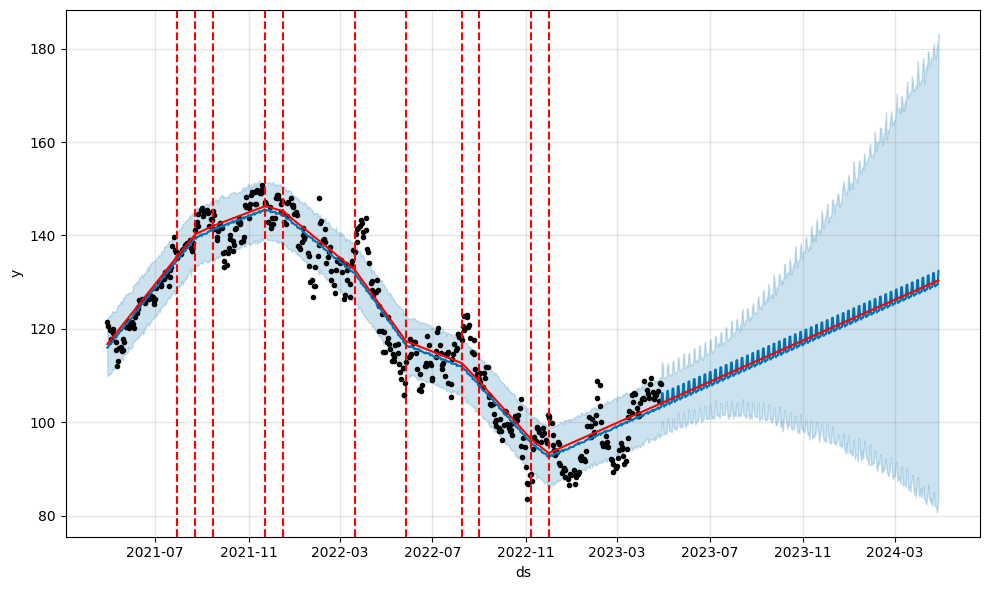

In [121]:
#plotting forecasted value
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

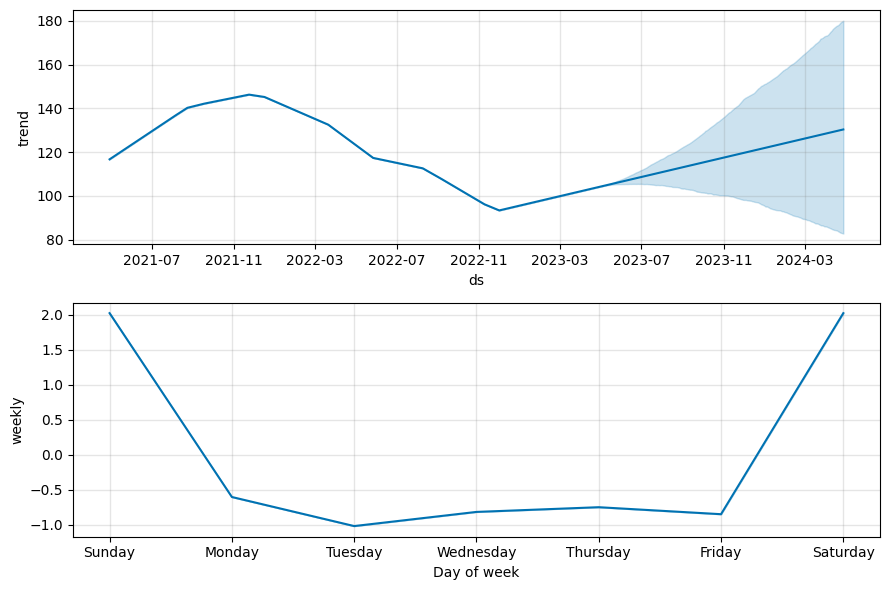

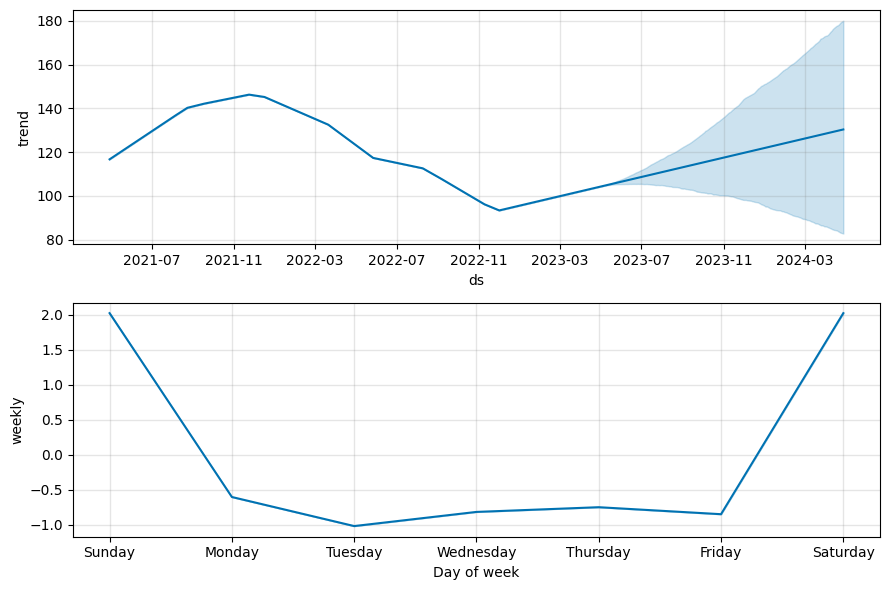

In [122]:
m.plot_components(forecast)

In [123]:
m_bad = Prophet(daily_seasonality=True)
m_bad.fit(goog.iloc[-252*2:])

# Make future predictions
future = m_bad.make_future_dataframe(periods=365)
forecast = m_bad.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/f3mwth_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/bmwwut4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15043', 'data', 'file=/tmp/tmppccjxeyg/f3mwth_w.json', 'init=/tmp/tmppccjxeyg/bmwwut4w.json', 'output', 'file=/tmp/tmppccjxeyg/prophet_modelltvuylx2/prophet_model-20230511182209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:22:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:22:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


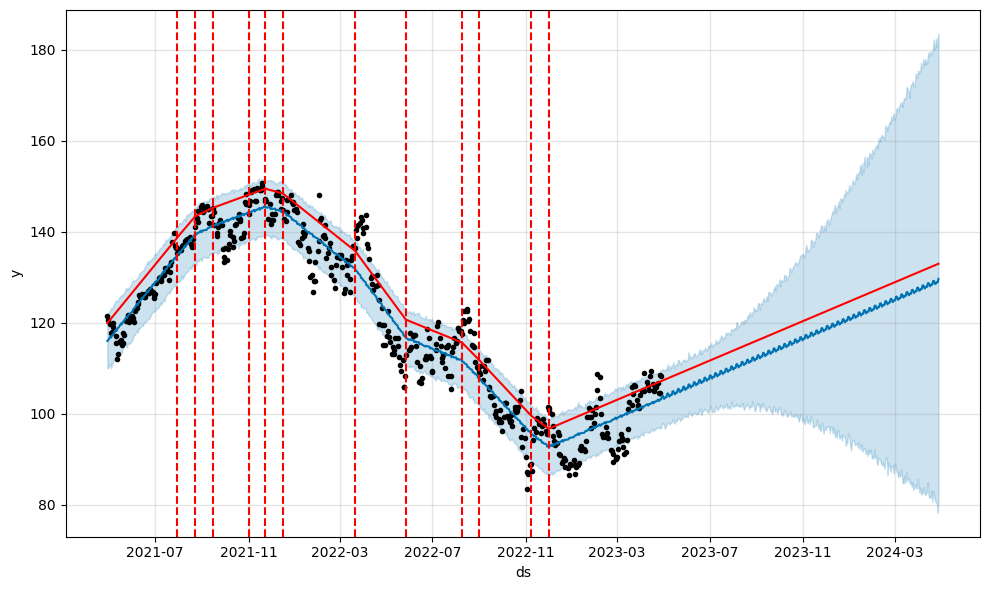

In [124]:
#plotting forecasted value
fig=m_bad.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m_bad,forecast)

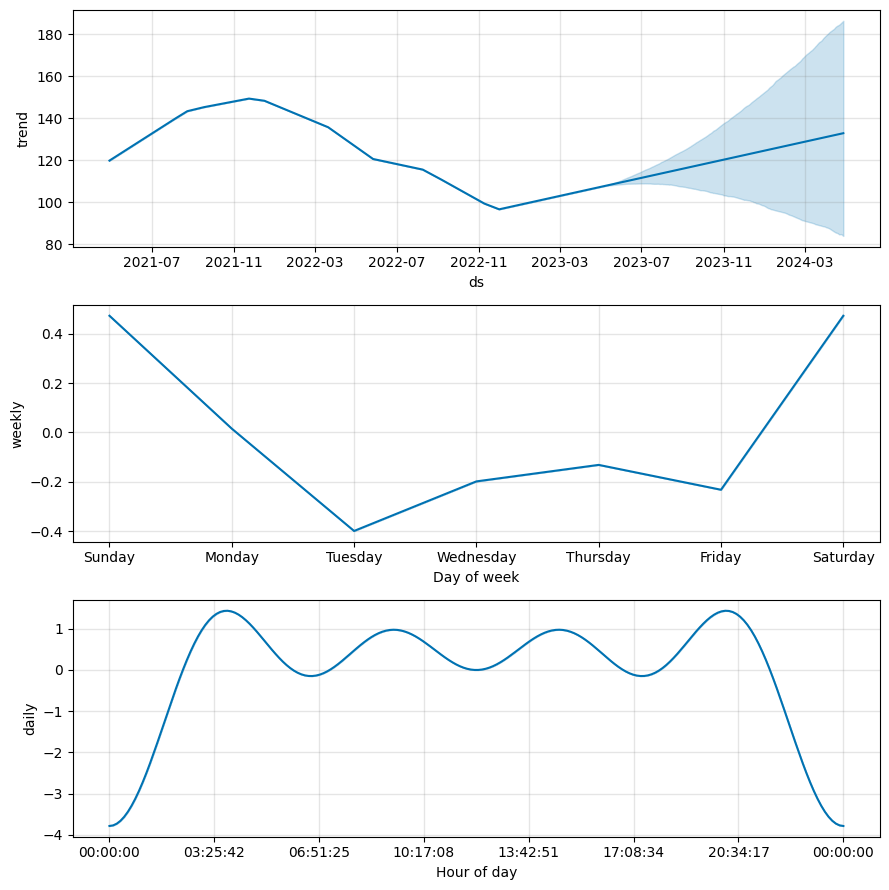

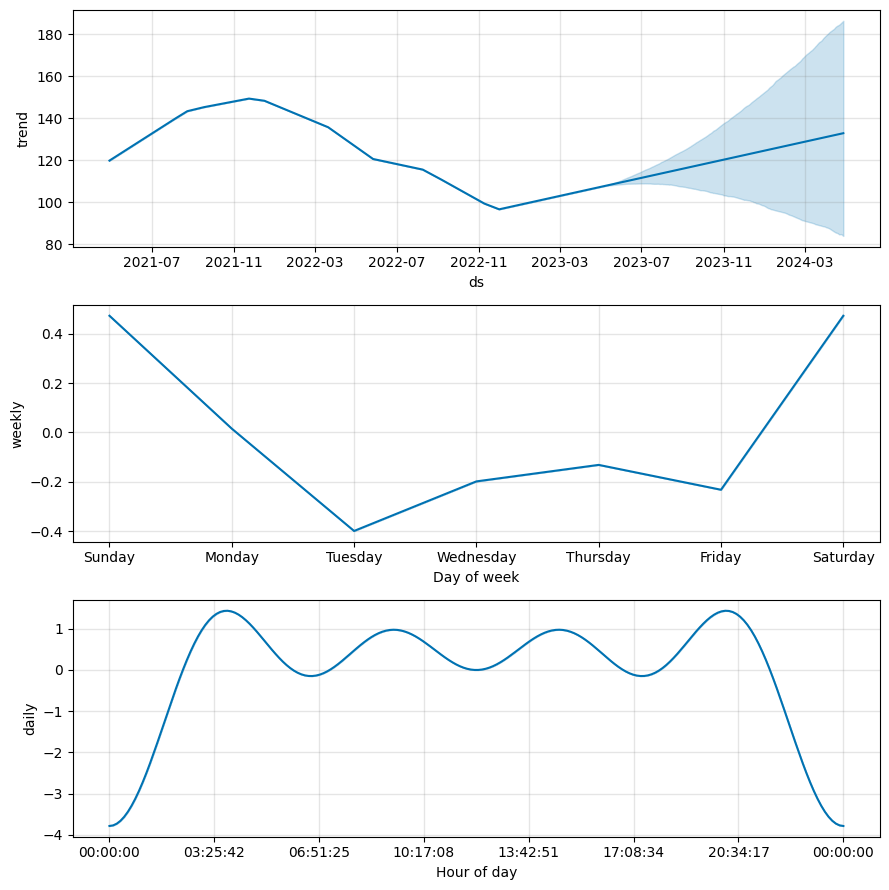

In [125]:
m_bad.plot_components(forecast)

In [126]:
m1 = Prophet(weekly_seasonality=False)
m1.fit(goog.iloc[-252*2:])

# Make future predictions
future = m1.make_future_dataframe(periods=365)
forecast = m1.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/ck4khp1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/vuowwrvf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82206', 'data', 'file=/tmp/tmppccjxeyg/ck4khp1a.json', 'init=/tmp/tmppccjxeyg/vuowwrvf.json', 'output', 'file=/tmp/tmppccjxeyg/prophet_model23nrxxk6/prophet_model-20230511182246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:22:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:22:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


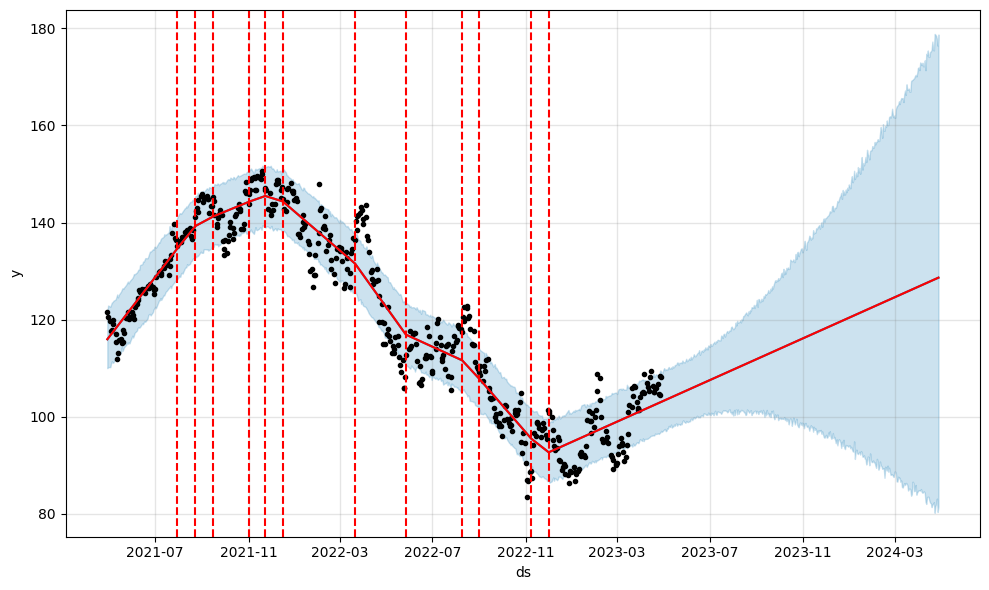

In [127]:
#plotting forecasted value
fig=m1.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m1,forecast)

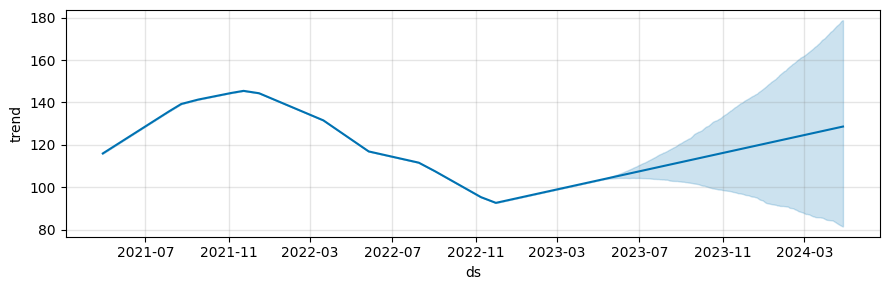

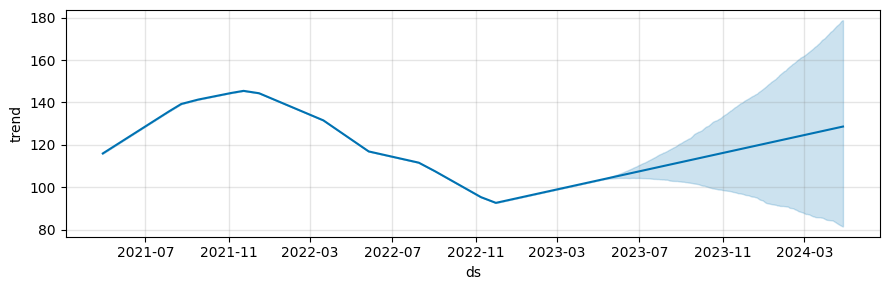

In [128]:
m1.plot_components(forecast)

#Cross Validation

In [129]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [130]:
m = Prophet(weekly_seasonality=False)


In [131]:
m.fit(goog.iloc[-252*2:])



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/wom9tmy4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/30zr4fhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36459', 'data', 'file=/tmp/tmppccjxeyg/wom9tmy4.json', 'init=/tmp/tmppccjxeyg/30zr4fhv.json', 'output', 'file=/tmp/tmppccjxeyg/prophet_model508jrno5/prophet_model-20230511182318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:23:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:23:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [132]:
df_cv=cross_validation(m,initial='365 days',period='5 days',horizon='5 days')

INFO:prophet:Making 72 forecasts with cutoffs between 2022-05-03 00:00:00 and 2023-04-23 00:00:00


  0%|          | 0/72 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/_d_0z21p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/b2cx5ywu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11054', 'data', 'file=/tmp/tmppccjxeyg/_d_0z21p.json', 'init=/tmp/tmppccjxeyg/b2cx5ywu.json', 'output', 'file=/tmp/tmppccjxeyg/prophet_model__7ct97p/prophet_model-20230511182325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:23:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:23:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/5_wtpf8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/edkx0cgk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [133]:
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-05-04,126.580976,121.011480,132.153164,122.574997,2022-05-03
1,2022-05-05,126.455753,120.337320,132.010428,116.746498,2022-05-03
2,2022-05-06,126.330530,120.584704,131.691216,115.660004,2022-05-03
3,2022-05-09,124.988426,119.171275,130.608767,113.084000,2022-05-08
4,2022-05-10,124.853483,119.275640,130.672720,114.584503,2022-05-08
5,2022-05-11,124.718540,119.032935,130.886038,113.960999,2022-05-08
6,2022-05-12,124.583597,118.926090,130.007578,113.161003,2022-05-08
7,2022-05-13,124.448654,118.491441,129.792451,116.515503,2022-05-08
8,2022-05-16,120.743096,115.155493,126.615000,114.792503,2022-05-13
9,2022-05-17,120.554253,114.886634,126.325728,116.701500,2022-05-13


In [134]:
df_cv.shape

(248, 6)

In [135]:
naive=df_cv[['ds','yhat','y','cutoff']].copy()

In [136]:
naive_storage=np.zeros(naive.shape[0])
one_day=pd.Timedelta(1,'day')

for i,row in naive.iterrows():
  cutoff=row['cutoff']

  #must find last cutoff that actually exists in df
  while cutoff not in goog.index:
    cutoff=cutoff-one_day

  naive_storage[i] =goog.loc[cutoff]['y']  

naive['yhat']=naive_storage  

  

In [137]:
pm=performance_metrics(df_cv)
pm['smape'].mean()

0.06262282792300176

In [138]:
naive_metrics=performance_metrics(naive)
naive_metrics['smape'].mean()

0.029186240575210198

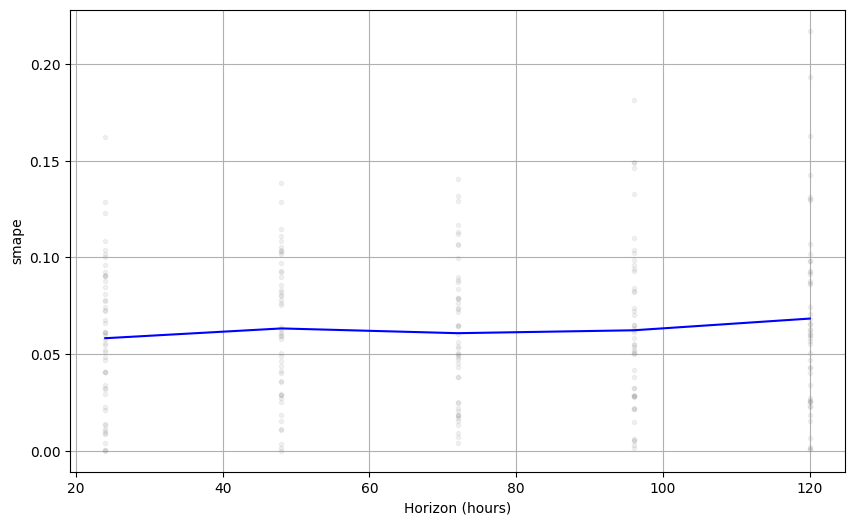

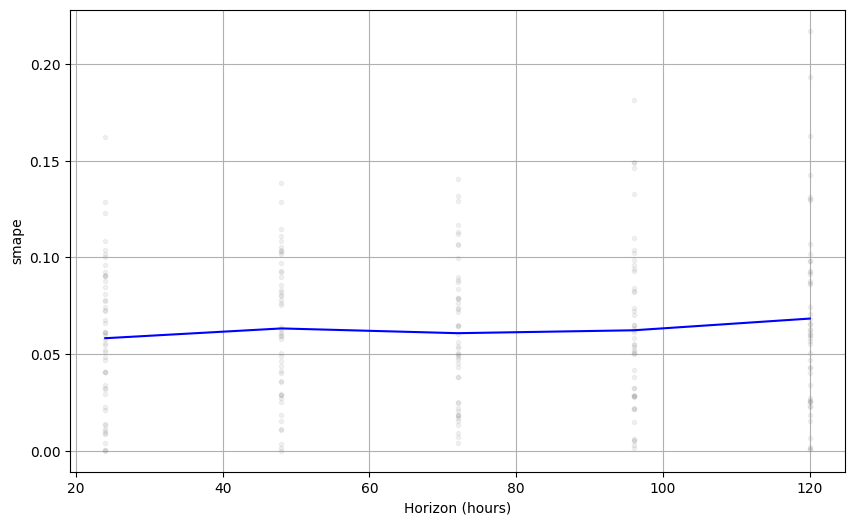

In [140]:
plot_cross_validation_metric(df_cv,metric='smape')

In [141]:
log_goog=goog.copy()
log_goog['y']=np.log(goog['y'])

In [142]:
m = Prophet(weekly_seasonality=False)
m.fit(goog.iloc[-252*2:])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/r58wvch4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/9w7ba9dt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36688', 'data', 'file=/tmp/tmppccjxeyg/r58wvch4.json', 'init=/tmp/tmppccjxeyg/9w7ba9dt.json', 'output', 'file=/tmp/tmppccjxeyg/prophet_modelwoialul3/prophet_model-20230511183034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [143]:
df_cv=cross_validation(m,initial='365 days',period='5 days',horizon='5 days')

INFO:prophet:Making 72 forecasts with cutoffs between 2022-05-03 00:00:00 and 2023-04-23 00:00:00


  0%|          | 0/72 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/ajqi2l7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/zb17y0jt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39828', 'data', 'file=/tmp/tmppccjxeyg/ajqi2l7e.json', 'init=/tmp/tmppccjxeyg/zb17y0jt.json', 'output', 'file=/tmp/tmppccjxeyg/prophet_model2sfz4zmo/prophet_model-20230511183039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/vu_0ksn2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppccjxeyg/qw2py3qo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [144]:
pm=performance_metrics(df_cv)

In [145]:
pm['smape'].mean()

0.06262282792300176

In [ ]:
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-05-04,126.580976,121.011480,132.153164,122.574997,2022-05-03
1,2022-05-05,126.455753,120.337320,132.010428,116.746498,2022-05-03
2,2022-05-06,126.330530,120.584704,131.691216,115.660004,2022-05-03
3,2022-05-09,124.988426,119.171275,130.608767,113.084000,2022-05-08
4,2022-05-10,124.853483,119.275640,130.672720,114.584503,2022-05-08
5,2022-05-11,124.718540,119.032935,130.886038,113.960999,2022-05-08
6,2022-05-12,124.583597,118.926090,130.007578,113.161003,2022-05-08
7,2022-05-13,124.448654,118.491441,129.792451,116.515503,2022-05-08
8,2022-05-16,120.743096,115.155493,126.615000,114.792503,2022-05-13
9,2022-05-17,120.554253,114.886634,126.325728,116.701500,2022-05-13


In [146]:
naive_storage=np.zeros(naive.shape[0])
one_day=pd.Timedelta(1,'day')

for i,row in naive.iterrows():
  cutoff=row['cutoff']

  #must find last cutoff that actually exists in df
  while cutoff not in goog.index:
    cutoff=cutoff-one_day

  naive_storage[i] =goog.loc[cutoff]['y']  

naive['yhat']=naive_storage  

  

In [147]:
naive_metrics=performance_metrics(naive)
naive_metrics['smape'].mean()

0.029186240575210198

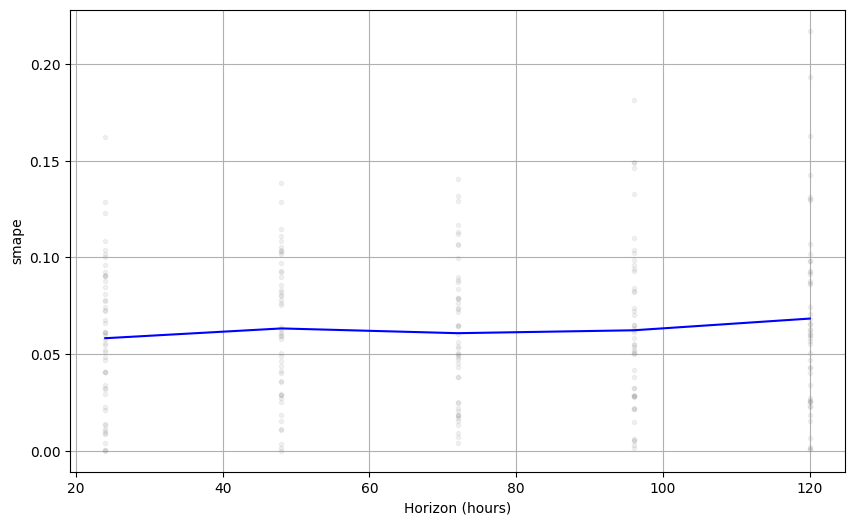

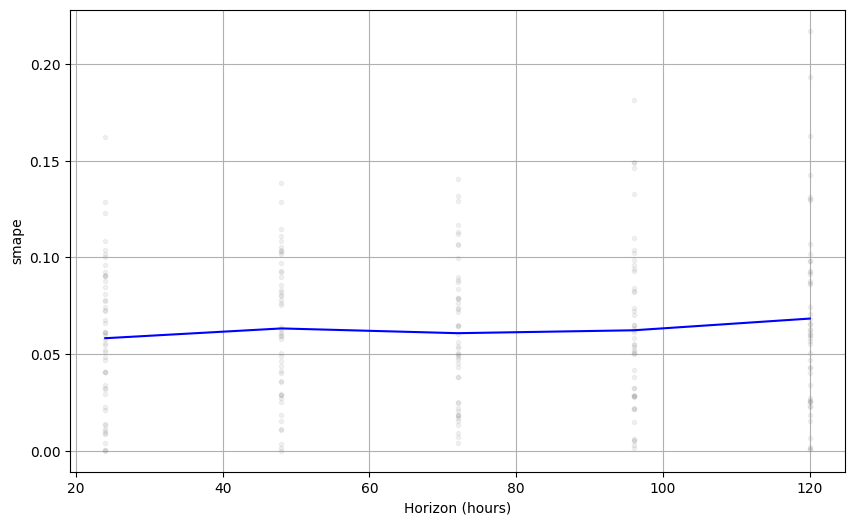

In [148]:
plot_cross_validation_metric(df_cv,metric='smape')

In [ ]:
df_cv.shape

(248, 6)

In [ ]:
naive=df_cv[['ds','yhat','y','cutoff']].copy()

In [ ]:
# Make future predictions
future = m1.make_future_dataframe(periods=365)
forecast = m1.predict(future)